2025-06-29 10:46:26.675270: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-06-29 10:46:26.675309: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-29 10:46:26.675313: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-06-29 10:46:26.675332: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-29 10:46:26.675346: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 17572 files belonging to 38 classes.


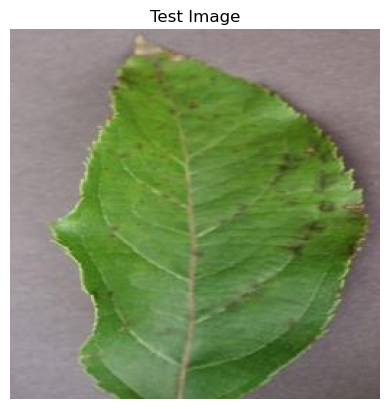

2025-06-29 10:46:28.341922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-06-29 10:46:28.356183: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Prediction Vector: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Predicted Class Index: 2
Predicted Disease Name: Apple___Cedar_apple_rust


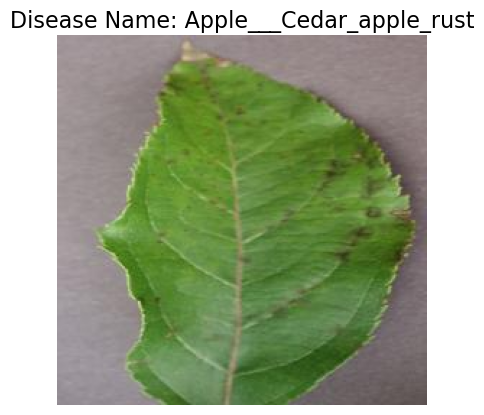

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load your trained model
cnn = tf.keras.models.load_model('trained_plant_disease_model11.keras')

# Load class names from validation set
valid_path = 'Downloads/Plants/valid'  # Adjust path if needed
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32
)
class_names = validation_set.class_names

# Test image path (change this path to your actual test image)
image_path = 'Downloads/Plants/test/AppleScab1.JPG'

# Read and show the image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Test Image")
plt.axis("off")
plt.show()

# Prepare image for prediction
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Add batch dimension

# Predict
predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)
predicted_class = class_names[result_index]

# Show result
print("Prediction Vector:", predictions)
print("Predicted Class Index:", result_index)
print("Predicted Disease Name:", predicted_class)

# Display the image with predicted label
plt.imshow(img_rgb)
plt.title(f"Disease Name: {predicted_class}", fontsize=16)
plt.axis("off")
plt.show()


In [2]:
confidence = predictions[0][result_index] * 100
print(f"Confidence: {confidence:.2f}%")


Confidence: 100.00%
